# Load dataset and clean
- Step 1 – Drop columns with too many missing value
- Step 2 – Keep only rows with at least 70% non-missing values
- Step 3 – Remove outliers based on key numerical columns

In [1]:
import sys, os

# Add the project root to the Python path
project_root = os.path.abspath("../..")
sys.path.append(project_root)

# Imports from local modules
import pandas as pd
from utils.data_cleaner import DataCleaner
from utils.constants import RAW_DATA_FILE, CLEANED_DATA_FILE, ML_READY_DATA_FILE



# === Load raw dataset ===
print(f"Loading dataset from: {RAW_DATA_FILE}")
df_raw = pd.read_csv(RAW_DATA_FILE)
print(f"Initial shape: {df_raw.shape}")

# === Apply data cleaning steps ===
cleaner = DataCleaner(missing_threshold=0.5, row_threshold=0.7)

# Step 1: Drop columns with too many missing values
df_step1 = cleaner.drop_columns_with_missing_values(df_raw)

# Step 2: Drop rows with too many missing values
df_step2 = cleaner.drop_rows_with_missing_values(df_step1)

# Step 3: Remove outliers based on numerical rules
df_cleaned = cleaner.remove_outliers(df_step2)

# === Save cleaned dataset ===
os.makedirs(os.path.dirname(CLEANED_DATA_FILE), exist_ok=True)
df_cleaned.to_csv(CLEANED_DATA_FILE, index=False)
print(f"\nCleaned dataset saved to: {CLEANED_DATA_FILE}")

# === Save a 10-row sample as Excel file for review ===
os.makedirs(os.path.dirname(ML_READY_DATA_FILE), exist_ok=True)
excel_sample_path = ML_READY_DATA_FILE.replace(".csv", "_sample10.xlsx")
df_cleaned.head(10).to_excel(excel_sample_path, index=False)
print(f"Sample Excel file saved to: {excel_sample_path}")


Loading dataset from: E:\_SoftEng\_BeCode\real-estate-price-predictor\data\raw\immoweb_real_estate.csv


Initial shape: (80368, 53)

=== Drop columns with missing values ===
Initial number of columns: 53
Number of columns dropped: 31
Remaining columns: 22
Columns dropped: ['roomCount', 'monthlyCost', 'hasAttic', 'hasBasement', 'hasDressingRoom', 'diningRoomSurface', 'hasDiningRoom', 'floorCount', 'streetFacadeWidth', 'hasLift', 'hasHeatPump', 'hasPhotovoltaicPanels', 'hasThermicPanels', 'kitchenSurface', 'landSurface', 'livingRoomSurface', 'hasBalcony', 'hasGarden', 'gardenSurface', 'gardenOrientation', 'parkingCountIndoor', 'parkingCountOutdoor', 'hasAirConditioning', 'hasArmoredDoor', 'hasVisiophone', 'hasOffice', 'hasSwimmingPool', 'hasFireplace', 'terraceSurface', 'terraceOrientation', 'accessibleDisabledPeople']

=== Drop rows with too many missing values ===
Threshold: ≥ 15 non-null columns
Rows before: 80368, after: 70125, removed: 10243

=== Outlier Removal Summary ===
Rows before: 70125, after: 30189, removed: 39936



Cleaned dataset saved to: E:\_SoftEng\_BeCode\real-estate-price-predictor\data\immoweb_real_estate_cleaned_dataset.csv


Sample Excel file saved to: E:\_SoftEng\_BeCode\real-estate-price-predictor\data\ml_ready\immoweb_real_estate_ml_ready_sample10.xlsx


## Load and Explore the Dataset

- Load dataset
- df.head(), df.info(), df.describe()
- Visual summary: distributions, correlations, missing values

In [2]:
# Load and Explore the Dataset

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load the cleaned dataset
print(f"Loading dataset from: {CLEANED_DATA_FILE}")
df_cleaned = pd.read_csv(CLEANED_DATA_FILE)

# Display basic structure
print("Dataset loaded successfully!")
print("Shape:", df_cleaned.shape)

# Display the first rows
df_cleaned.head()

# Check column types and non-null counts
df_cleaned.info()

# Summary statistics for numerical columns
df_cleaned.describe()





Loading dataset from: E:\_SoftEng\_BeCode\real-estate-price-predictor\data\immoweb_real_estate_cleaned_dataset.csv
Dataset loaded successfully!
Shape: (30189, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30189 entries, 0 to 30188
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                30189 non-null  int64  
 1   id                        30189 non-null  float64
 2   url                       30189 non-null  object 
 3   type                      30189 non-null  object 
 4   subtype                   30189 non-null  object 
 5   bedroomCount              30189 non-null  float64
 6   bathroomCount             30189 non-null  float64
 7   province                  30189 non-null  object 
 8   locality                  30189 non-null  object 
 9   postCode                  30189 non-null  int64  
 10  habitableSurface          30189 non-null  float64
 11  building

,Unnamed: 0,id,bedroomCount,bathroomCount,postCode,habitableSurface,buildingConstructionYear,facedeCount,toiletCount,price
count,30189.000000,3.018900e+04,30189.000000,30189.000000,30189.000000,30189.000000,30189.000000,22224.000000,30189.000000,3.018900e+04
mean,191679.542681,1.986363e+07,2.844778,1.275266,4909.526748,152.700454,1978.788102,2.820509,1.643811,3.946684e+05
std,114782.544023,2.409397e+06,1.196765,0.566340,3141.451520,79.611575,39.454688,1.021503,0.759004,2.024915e+05
min,0.000000,1.882546e+06,1.000000,1.000000,1000.000000,15.000000,1850.000000,1.000000,1.000000,5.000000e+04
25%,175809.000000,2.040835e+07,2.000000,1.000000,2100.000000,93.000000,1957.000000,2.000000,1.000000,2.550000e+05
50%,226620.000000,2.054793e+07,3.000000,1.000000,3900.000000,135.000000,1980.000000,3.000000,2.000000,3.490000e+05
75%,254669.000000,2.062074e+07,3.000000,1.000000,8420.000000,191.000000,2016.000000,4.000000,2.000000,4.750000e+05
max,446550.000000,2.066439e+07,10.000000,5.000000,9992.000000,500.000000,2025.000000,86.000000,5.000000,1.200000e+06


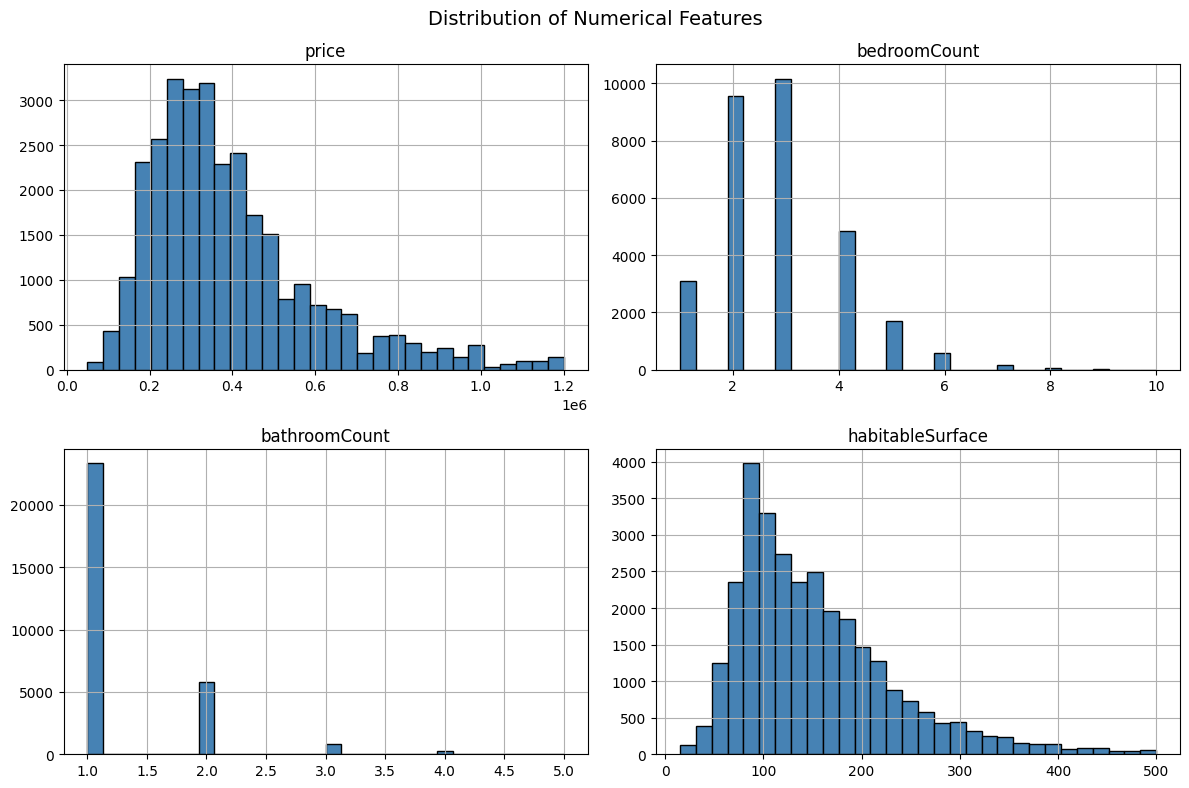

In [3]:
# Plot distributions of key numerical variables
numerical_cols = ['price', 'bedroomCount', 'bathroomCount', 'habitableSurface']
df_cleaned[numerical_cols].hist(figsize=(12, 8), bins=30, color="steelblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

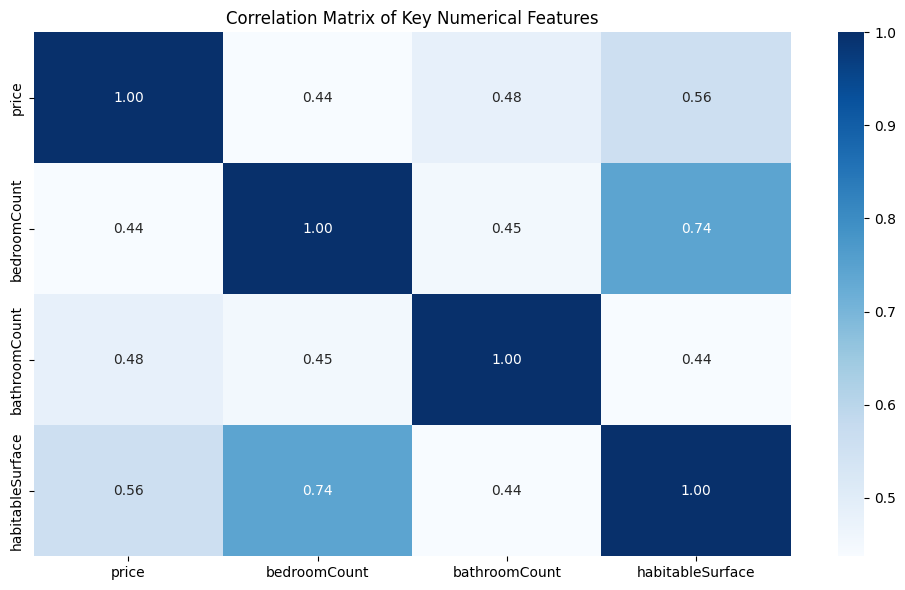

In [4]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[numerical_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix of Key Numerical Features")
plt.tight_layout()
plt.show()

# Visualize missing values using missingno

Loading dataset from: E:\_SoftEng\_BeCode\real-estate-price-predictor\data\immoweb_real_estate_cleaned_dataset.csv


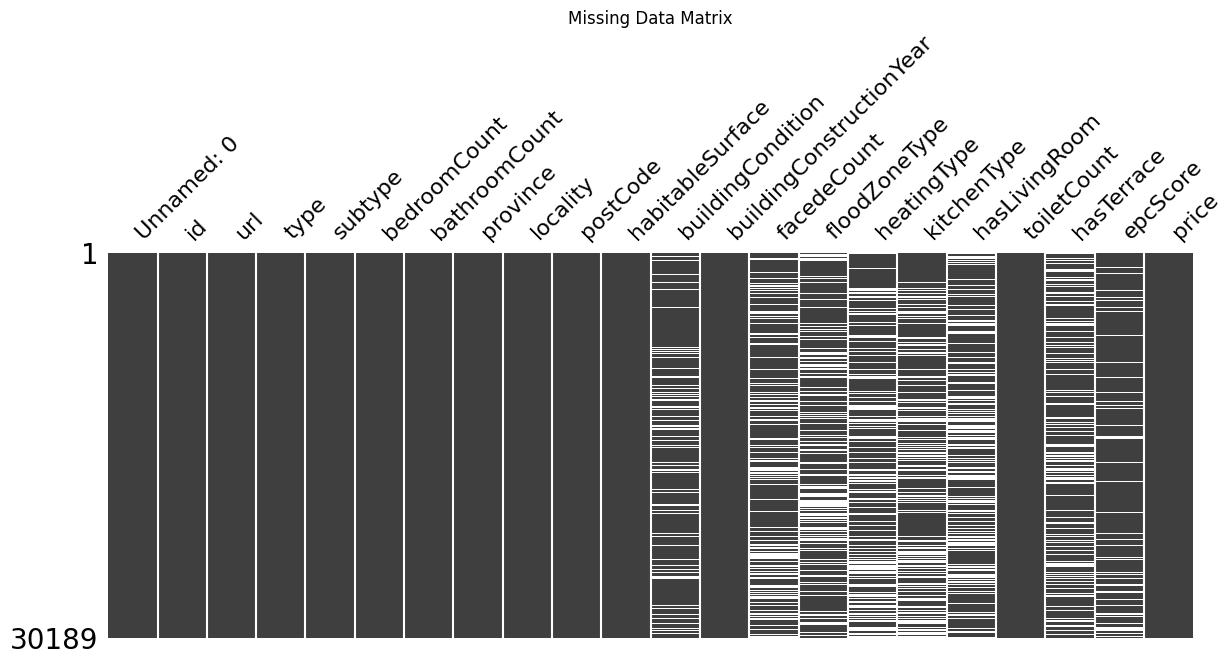

In [5]:
import missingno as msno

# Load the cleaned dataset
print(f"Loading dataset from: {CLEANED_DATA_FILE}")
df_cleaned = pd.read_csv(CLEANED_DATA_FILE)

# Visualize missing values using missingno
msno.matrix(df_cleaned, figsize=(14, 5), sparkline=False)
plt.title("Missing Data Matrix")
plt.show()